In [229]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans

data_MK = pd.read_csv(
    "/Users/cordiez/Documents/CompaniesHouse/OutputFiles/MK_geocoded.csv", index_col=0
)
data_CB_geoloc = pd.read_csv(
    "/Users/cordiez/Documents/CompaniesHouse/OutputFiles/CB_geolocated.csv", index_col=0
)

In [230]:
a = data_CB_geoloc.rename(columns={"Organization Name": "CompanyName"})[
    ["Lat", "Lon", "CompanyName"]
]
a["Category"] = 3
b = data_MK[["Lat", "Lon", "CompanyName"]]
b["Category"] = 0

df = a.append(b)
df = df[
    (df["Lat"] < 52.11)
    & (df["Lat"] > 51.9)
    & (df["Lon"] > -0.869)
    & (df["Lon"] < -0.637)
]

"""
fig = px.scatter_mapbox(df,
                        lat="Lat",
                        lon="Lon",
                        hover_name = 'CompanyName',
                           color ='Category',
                        size_max = 0.1,
                        zoom=10)

fig.update_layout(mapbox_style="open-street-map")
"""

<ipython-input-230-8910a93f80ba>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'\nfig = px.scatter_mapbox(df,\n                        lat="Lat",\n                        lon="Lon",\n                        hover_name = \'CompanyName\',\n                           color =\'Category\',\n                        size_max = 0.1,\n                        zoom=10)\n\nfig.update_layout(mapbox_style="open-street-map")\n'

In [231]:
df_all = df

In [13]:
X = np.array(df[["Lat", "Lon"]].apply(list, axis=1).tolist())


Sum_of_squared_distances = []
"""K = range(1,60,5)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()"""

kmeans = KMeans(n_clusters=200)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

df["Cluster"] = y_kmeans
# df['Center_lat'] = centers[:,0]
# df['Center_lon'] = centers[:,1]

fig = px.scatter_mapbox(
    df, lat="Lat", lon="Lon", hover_name="CompanyName", color="Cluster", zoom=10
)


fig.update_layout(mapbox_style="open-street-map")

In [173]:
fig.write_html("/Users/cordiez/Documents/CompaniesHouse/Plotly/110ClustersMK.html")

In [109]:
df = data_MK[
    (data_MK["Lat"] > 52.05)
    & (data_MK["Lat"] < 52.10083527381011)
    & (data_MK["Lon"] < 0.636568598843307)
]

CompanyName  CompanyNumber  \
596                    (UK) SWEET HOMES LTD       12060582   
2923                      1 MK TAXI LIMITED       12576511   
3594             1-16 MINIBUSES/MVL LIMITED        7609538   
4580                       10 TENTACLES LTD       12823526   
5289     101 CONSTRUCTION & LANDSCAPING LTD       12779229   
...                                     ...            ...   
4912631                 ZKS HOUSING LIMITED       10611007   
4913009                       ZMF CYBER LTD       13225369   
4915273                ZOOM DISPATCH UK LTD       12687662   
4915478                       ZOOMI LIMITED       11179793   
4917922                    ZUNITIVE LIMITED       13336006   

                  RegAddress.AddressLine1         RegAddress.AddressLine2  \
596                      3 BLUNDELLS ROAD                       BRADVILLE   
2923                    71 STRATFORD ROAD                       WOLVERTON   
3594                     44 CARROLL CLOSE                 NEWPORT PAGNELL   
4580                    18 GODDARDS CROFT                       WOLVERTON   
5289            3 WARREN YARD WARREN PARK  STRATFORD ROAD, WOLVERTON MILL   
...                                   ...                             ...   
4912631                   9 VERMONT PLACE                        TONGWELL   
4913009                33 GLOUCESTER ROAD                       WOLVERTON   
4915273                      19 LINGFIELD                    STACY BUSHES   
4915478               19 RADCLIFFE STREET                       WOLVERTON   
4917922  SUITE #D326449, 68 TANNERS DRIVE                      BLAKELANDS   

        RegAddress.PostTown RegAddress.PostCode CompanyStatus  \
596           MILTON KEYNES            MK13 7HA        Active   
2923          MILTON KEYNES            MK12 5LT        Active   
3594          MILTON KEYNES            MK16 8QH        Active   
4580          MILTON KEYNES            MK12 5DA        Active   
5289          MILTON KEYNES            MK12 5NW        Active   
...                     ...                 ...           ...   
4912631       MILTON KEYNES            MK15 8JA        Active   
4913009       MILTON KEYNES            MK12 5EA        Active   
4915273       MILTON KEYNES            MK12 6HB        Active   
4915478       MILTON KEYNES            MK12 5DQ        Active   
4917922       MILTON KEYNES          BLAKELANDS        Active   

        IncorporationDate                                  SICCode.SicText_1  \
596            19/06/2019      68100 - Buying and selling of own real estate   
2923           28/04/2020                             49320 - Taxi operation   
3594           19/04/2011             49390 - Other passenger land transport   
4580           19/08/2020  47910 - Retail sale via mail order houses or v...   
5289           29/07/2020       41201 - Construction of commercial buildings   
...                   ...                                                ...   
4912631        09/02/2017  68209 - Other letting and operating of own or ...   
4913009        25/02/2021  62020 - Information technology consultancy act...   
4915273        22/06/2020                             49320 - Taxi operation   
4915478        31/01/2018                       68310 - Real estate agencies   
4917922        15/04/2021  47910 - Retail sale via mail order houses or v...   

                                         SICCode.SicText_2  ...  \
596      68209 - Other letting and operating of own or ...  ...   
2923                                                   NaN  ...   
3594                                                   NaN  ...   
4580                                                   NaN  ...   
5289            41202 - Construction of domestic buildings  ...   
...                                                    ...  ...   
4912631                                                NaN  ...   
4913009                                                NaN  ...   
4915273          

Regex process

In [40]:
import re

data_CB_geoloc = pd.read_excel(
    "/Users/cordiez/Documents/CompaniesHouse/OutputFiles/CB_geolocated.xlsx"
)
data_CB_geoloc["Position"] = None
data_CB_geoloc["Lat"] = None
data_CB_geoloc["Lon"] = None

cpt = 0
for i in data_CB_geoloc.index:

    ch = data_CB_geoloc.loc[i, "MapsUrl"]
    if not pd.isna(ch):
        cpt += 1
        g = re.search("\@(\d{1,2})\.(\d{2,8}),(-)?(\d{1,2})\.(\d{2,8})", ch)
        lat = float(g[1] + "." + g[2])
        lon = float(g[3] + g[4] + "." + g[5])
        data_CB_geoloc.loc[i, "Position"] = (lat, lon)
        data_CB_geoloc.loc[i, "Lat"] = lat
        data_CB_geoloc.loc[i, "Lon"] = lon
data_CB_geoloc.to_csv(
    "/Users/cordiez/Documents/CompaniesHouse/OutputFiles/CB_geolocated.csv"
)

In [45]:
fig = px.scatter_mapbox(
    data_CB_geoloc, lat="Lat", lon="Lon", hover_name="Organization Name", zoom=10
)
fig.update_layout(mapbox_style="open-street-map")

In [30]:
data_CB = pd.read_csv(
    "/Users/cordiez/Documents/CompaniesHouse/OutputFiles/CB_2.csv", index_col=0
)

len(data_CB[~data_CB["Total Funding Amount"].isna()])

26

In [14]:
import plotly.graph_objects as go

In [43]:
x[x["Industries"].str.contains("Information Technology")]

Organization Name  \
1                           Envisics   
6                            Celaton   
20                             Kulea   
28                         Fabulyzer   
35        Maintenance Management Ltd   
..                               ...   
446                      Microsmiths   
457       PLACITO SOFTWARE SOLUTIONS   
461                   Power Internet   
466  Retail Business Solutions Group   
487                          Kinetic   

                                            Industries  \
1    Augmented Reality, Automotive, Information Tec...   
6    Artificial Intelligence, Information Services,...   
20        E-Commerce, Information Technology, Internet   
28   Health Care, Information Technology, Internet ...   
35                  Consulting, Information Technology   
..                                                 ...   
446  Computer, Information Services, Information Te...   
457  Consulting, Human Resources, Information Techn...   
461  Information Services, Information Technology, ...   
466                   Information Technology, Software   
487  Catering, Events, Information Technology, Soft...   

                            Headquarters Location  \
1    Milton Keynes, Milton Keynes, United Kingdom   
6    Milton Keynes, Milton Keynes, United Kingdom   
20   Milton Keynes, Milton Keynes, United Kingdom   
28   Milton Keynes, Milton Keynes, United Kingdom   
35   Milton Keynes, Milton Keynes, United Kingdom   
..                                            ...   
446  Milton Keynes, Milton Keynes, United Kingdom   
457  Milton Keynes, Milton Keynes, United Kingdom   
461  Milton Keynes, Milton Keynes, United Kingdom   
466  Milton Keynes, Milton Keynes, United Kingdom   
487  Milton Keynes, Milton Keynes, United Kingdom   

                                           Description  CB Rank (Company)  \
1    Envisics develops a dynamic holography platfor...             8769.0   
6    Celaton provides inSTREAM™, a hosted service b...            46997.0   
20   Kulea is an automation and personalization pla...           100883.0   
28   Fabulyzer is a wearable health device that pro...           158714.0   
35   MML is a privately held company that provides ...           175856.0   
..                                                 ...                ...   
446  Microsmiths is a business computer solutions c...          1214455.0   
457  Placito Software Solutions is an IT Services, ...          1262227.0   
461  Power Internet have provided internet connecti...          1273680.0   
466  Retail Business Solutions Group provide front ...          1289195.0   
487  Kinetic is a software solution provider for st...                NaN   

     Headquarters Regions  Diversity Spotlight (US Only)  \
1                     NaN                            NaN   
6                     NaN                            NaN   
20                    NaN                            NaN   
28                    NaN                            NaN   
35                    NaN                            NaN   
..                    ...                            ...   
446                   NaN                            NaN   
457                   NaN                            NaN   
461                   NaN                            NaN   
466                   NaN                            NaN   
487                   NaN                            NaN   

    Estimated Revenue Range Operating Status Founded Date  ...  \
1               $1M to $10M           Active  Jan 1, 2018  ...   
6               $1M to $10M           Active         1993  ...   
20              $1M to $10M           Active  Jan 1, 2015  ...   
28                      NaN           Active  Jul 1, 2014  ...   
35                      NaN           Active         2001  ...   
..                      ...              ...          ...  ...   
446           Less than $1M           Active  May 7, 1985  ...   
457                     NaN   

In [115]:
data_density = df[df.Category == 3]
m1 = np.array(data_density.Lat.tolist())
xmin = min(m1)
xmax = max(m1)

m2 = np.array(data_density.Lon.tolist())
ymin = min(m2)
ymax = max(m2)

In [114]:
from scipy import stats

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])

kernel = stats.gaussian_kde(values)

Z = np.reshape(kernel(positions).T, X.shape)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 0 and the array at index 1 has size 386

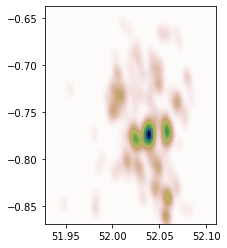

In [525]:
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z_all), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
# ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [183]:
a = df[df.Category == 3]
b = df[df.Category == 0]

In [428]:
token = "pk.eyJ1IjoidGhlb3BoaWxlY2R6IiwiYSI6ImNrczl5bGp1YjA0ODAyb29odzBydjB3N3UifQ.YOhSRbEaPpkXf8yAZhZ6pQ"
shaz13_custom_style = "mapbox://styles/theophilecdz/ckob44zll0igv18oaenutniuf"
a = df[df.Category == 3]
b = df[df.Category == 0]

data = [
    go.Contour(x=X[:, 0], y=Y[0, :], z=Z, opacity=0.3),  # horizontal axis
    ###
    go.Scattermapbox(
        lat=b["Lat"],
        lon=b["Lon"],
        mode="markers",
        marker=dict(
            size=3,
            color="grey",
            opacity=0.8,
        ),
        name="Classic companies (from Companies House)",
    ),
    ###
    go.Scattermapbox(
        lat=a["Lat"],
        lon=a["Lon"],
        mode="markers",
        marker=dict(
            size=4,
            color="red",
            opacity=1,
        ),
        name="Startups (from CrunchBase)",
    ),
]
# set the layout to plot
layout = go.Layout(
    autosize=False,
    mapbox=dict(
        accesstoken=token,
        bearing=0,
        pitch=0,
        zoom=10,
        style=shaz13_custom_style,
        center=dict(lat=52.037, lon=-0.772),
    ),
    width=1000,
    height=800,
    title="Milton Keynes Companies",
)

fig = go.Figure(data=data[2], layout=layout)

fig.show()

In [ ]:
data = [
    go.Scatter(
        y=b["Lat"],
        x=b["Lon"],
        mode="markers",
        marker=dict(
            size=3,
            color="grey",
            opacity=0.8,
        ),
        name="Classic companies (from Companies House)",
    ),
    ###
    go.Scatter(
        y=a["Lat"],
        x=a["Lon"],
        mode="markers",
        marker=dict(
            size=4,
            color="red",
            opacity=1,
        ),
        name="Startups (from CrunchBase)",
    ),
]

layout = go.Layout(
    autosize=False,
    mapbox=dict(
        accesstoken=token,
        bearing=0,
        pitch=0,
        zoom=10,
        style=shaz13_custom_style,
        center=dict(lat=52.037, lon=-0.772),
    ),
    width=1000,
    height=800,
    title="Milton Keynes Companies",
)
fig = go.Figure(data=data, layout=layout)

fig.show()

In [515]:
X_all.shape

(100, 100)

In [536]:
min(a["Lat"])

51.2163407

In [120]:
from scipy import stats

a = df[df.Category == 3]
b = df[df.Category == 0]
data_density = df[df.Category == 3]

m1 = np.array(data_density.Lat.tolist())
xmin = min(m1)
xmax = max(m1)

m2 = np.array(data_density.Lon.tolist())
ymin = min(m2)
ymax = max(m2)

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])

kernel = stats.gaussian_kde(values)
kernel.set_bandwidth(bw_method=0.15)

Z = np.reshape(kernel(positions).T, X.shape)


gauche_bas = (-0.8637331, 51.94740770000001)
droite_haut = (-0.6552047, 52.0840506)
Dx = np.abs(droite_haut[0] - gauche_bas[0])
Dy = np.abs(droite_haut[1] - gauche_bas[1])


data = [
    go.Scatter(
        y=data_density["Lat"],
        x=data_density["Lon"],
        mode="markers",
        marker=dict(size=4, color="red", opacity=1),
    ),
    go.Contour(
        y=X[:, 0],  # horizontal axis
        x=Y[0, :],
        z=Z,
        colorscale="Hot",
        opacity=0.6,
        contours_coloring="heatmap",
        contours=dict(start=100, end=900, size=100),
    ),
]


layout = go.Layout(
    autosize=True,
    width=800,
    height=800,
    title="Density of startups in Milton Keynes - Gaussian Kernel Density Estimation, Bandwith : 0.15",
)


fig = go.Figure(data=data, layout=layout)

fig.add_layout_image(
    dict(
        source="https://i.ibb.co/xC0SFXF/Screenshot-2021-08-13-at-21-30-12.png",
        xref="x",
        yref="y",
        x=gauche_bas[0],
        y=droite_haut[1],
        sizex=np.abs(droite_haut[0] - gauche_bas[0]),
        sizey=np.abs(droite_haut[1] - gauche_bas[1]),
        sizing="stretch",
        opacity=0.7,
        layer="below",
    )
)

fig.show()

## Density for all companies

In [108]:
from scipy import stats

#### STARTUPS
data_density = df[df.Category == 3]
m1 = np.array(data_density.Lat.tolist())
xmin = min(m1)
xmax = max(m1)

m2 = np.array(data_density.Lon.tolist())
ymin = min(m2)
ymax = max(m2)

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])

kernel = stats.gaussian_kde(values)
kernel.set_bandwidth(bw_method=0.15)

Z = np.reshape(kernel(positions).T, X.shape)

### ALL COMPANIES

m1_all = np.array(df.Lat.tolist())
xmin = min(m1_all)
xmax = max(m1_all)

m2_all = np.array(df.Lon.tolist())
ymin = min(m2_all)
ymax = max(m2_all)
X_all, Y_all = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions_all = np.vstack([X_all.ravel(), Y_all.ravel()])
values_all = np.vstack([m1_all, m2_all])

kernel_all = stats.gaussian_kde(values_all)
# kernel_all.set_bandwidth(bw_method=0.15)

Z_all = np.reshape(kernel(positions_all).T, X_all.shape)


########

gauche_bas = (-0.8637331, 51.94740770000001)
droite_haut = (-0.6552047, 52.0840506)
Dx = np.abs(droite_haut[0] - gauche_bas[0])
Dy = np.abs(droite_haut[1] - gauche_bas[1])


data = [
    go.Scatter(
        y=df["Lat"],
        x=df["Lon"],
        mode="markers",
        marker=dict(
            size=4,
            color="red",
            opacity=0.05,
        ),
    ),
    go.Contour(
        y=X_all[:, 0],  # horizontal axis
        x=Y_all[0, :],
        z=Z_all,
        colorscale="Hot",
        opacity=0.6,
        contours_coloring="heatmap",
    ),
]


layout = go.Layout(
    autosize=True,
    width=800,
    height=800,
    title="Density of startups in Milton Keynes - Gaussian Kernel Density Estimation, Bandwith : 0.15",
)


fig = go.Figure(data=data, layout=layout)

fig.add_layout_image(
    dict(
        source="https://i.ibb.co/xC0SFXF/Screenshot-2021-08-13-at-21-30-12.png",
        xref="x",
        yref="y",
        x=gauche_bas[0],
        y=droite_haut[1],
        sizex=np.abs(droite_haut[0] - gauche_bas[0]),
        sizey=np.abs(droite_haut[1] - gauche_bas[1]),
        sizing="stretch",
        opacity=0.7,
        layer="below",
    )
)

fig.show()

ValueError: min() arg is an empty sequence

In [544]:
stats.normalize(Z)

AttributeError: module 'scipy.stats' has no attribute 'normalize'

In [565]:
Z_rel = Z / Z_all

Z_rel

array([[1.70109898e+10, 8.23470477e+09, 4.09177556e+09, ...,
        2.09376650e+22, 6.10160702e+22, 1.82517932e+23],
       [4.95793181e+08, 2.42599350e+08, 1.21849581e+08, ...,
        8.16004684e+20, 2.40369452e+21, 7.26793802e+21],
       [1.66793393e+07, 8.24970775e+06, 4.18835616e+06, ...,
        3.67083096e+19, 1.09300373e+20, 3.34059803e+20],
       ...,
       [1.03415304e+11, 1.14648158e+11, 1.30479983e+11, ...,
        1.23530625e+31, 7.01087569e+31, 4.28190442e+32],
       [7.06561752e+12, 7.94195142e+12, 9.16375584e+12, ...,
        2.15872993e+33, 1.19296790e+34, 7.03952764e+34],
       [6.03322285e+14, 6.86426668e+14, 8.01667297e+14, ...,
        4.47482757e+35, 2.42862990e+36, 1.39474670e+37]])

In [12]:
from scipy import stats

a = df[df.Category == 3]
b = df[df.Category == 0]

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])

kernel = stats.gaussian_kde(values)
kernel.set_bandwidth(bw_method=0.02)

Z = np.reshape(kernel(positions).T, X.shape)


gauche_bas = (-0.8637331, 51.94740770000001)
droite_haut = (-0.6552047, 52.0840506)
Dx = np.abs(droite_haut[0] - gauche_bas[0])
Dy = np.abs(droite_haut[1] - gauche_bas[1])


data = [
    go.Scatter(
        y=a["Lat"],
        x=a["Lon"],
        mode="markers",
        marker=dict(size=4, color="red", opacity=1),
    ),
    go.Contour(
        y=X[:, 0],  # horizontal axis
        x=Y[0, :],
        z=Z,
        colorscale="Hot",
        opacity=0.6,
        contours_coloring="heatmap",
        contours=dict(start=0, end=1000, size=25),
    ),
]


layout = go.Layout(
    autosize=True,
    width=800,
    height=800,
    title="Density of startups in Milton Keynes - Gaussian Kernel Density Estimation, Bandwith : 0.02",
)


fig = go.Figure(data=data, layout=layout)

fig.add_layout_image(
    dict(
        source="https://i.ibb.co/xC0SFXF/Screenshot-2021-08-13-at-21-30-12.png",
        xref="x",
        yref="y",
        x=gauche_bas[0],
        y=droite_haut[1],
        sizex=np.abs(droite_haut[0] - gauche_bas[0]),
        sizey=np.abs(droite_haut[1] - gauche_bas[1]),
        sizing="stretch",
        opacity=0.7,
        layer="below",
    )
)

fig.show()

NameError: name 'go' is not defined

## Objectif geomapping final!!!

In [275]:
import pandas as pd

In [276]:
cb_clusters = pd.read_csv(
    "/Users/cordiez/Documents/CompaniesHouse/OutputFiles/crunchbase_clusters.csv",
    index_col=0,
)
topics = {"cloud": 0, "iot": 5, "robotics": 6}
target_comp_cb = cb_clusters[cb_clusters["Category"].isin(list(topics.values()))]
data_CB_geoloc = pd.read_csv(
    "/Users/cordiez/Documents/CompaniesHouse/OutputFiles/CB_geolocated.csv", index_col=0
)
target_comp_cb = pd.merge(
    data_CB_geoloc[["Website", "Lat", "Lon"]], target_comp_cb, on="Website"
)
target_comp_cb = target_comp_cb[target_comp_cb["Lat"].isna() == False]

In [277]:
import json

df = pd.read_csv(
    "/Users/cordiez/Documents/CompaniesHouse/OutputFiles/gmaps_details.csv", index_col=0
)
data_MK = pd.read_csv(
    "/Users/cordiez/Documents/CompaniesHouse/OutputFiles/MK_geocoded.csv", index_col=0
)

idx = df[~df["details_output_from_candidate_request"].isna()].index
df["Website"] = None

for i in df.index:
    try:
        df.loc[i, "Website"] = json.loads(
            df.loc[i, "details_output_from_candidate_request"]
        )["result"]["website"]
    except:
        df.loc[i, "Website"] = None
df = df[["CompanyName", "Website"]]
df = df[~df["Website"].isna()]

# df.drop(columns= ['SICCode.SicText_1','SICCode.SicText_2','SICCode.SicText_3','SICCode.SicText_4', 'is_referenced', 'CompanyStatus'], inplace = True)
# websites_list = df[~df['Website'].isna()]['Website'].unique()
df = pd.merge(
    df,
    data_MK[["CompanyName", "Lat", "Lon"]],
    left_on="CompanyName",
    right_on="CompanyName",
)

In [278]:
ch_clusters = pd.read_csv(
    "/Users/cordiez/Documents/CompaniesHouse/OutputFiles/companieshouse_clusters.csv",
    index_col=0,
)
topics_ch = {"industrial automation": 6, "cloud & software": 0, "logistics": 18}
target_comp_ch = ch_clusters[ch_clusters["Category"].isin(list(topics_ch.values()))]
# target_comp_ch = ch_clusters[ch_clusters['Category'].isin([6,0])]
target_comp_ch = pd.merge(df, target_comp_ch, on="Website")
# target_comp_ch = target_comp_ch[target_comp_ch['Lat'].isna()==False]

target_comp_ch = target_comp_ch[target_comp_ch["Lat"].isna() == False]


def map_ch_category_names(df):
    mapping = {6: "Industrial Automation", 0: "Cloud Infrastructures", 18: "Logistics"}
    df["Activity"] = df["Category"].apply(lambda x: mapping[x])
    return df


def map_cb_category_names(df):
    mapping = {5: "IoT", 0: "Cloud Data Services", 6: "Robotics & Automation"}
    df["Activity"] = df["Category"].apply(lambda x: mapping[x])
    return df


target_comp_cb = map_cb_category_names(target_comp_cb)
target_comp_ch = map_ch_category_names(target_comp_ch)

In [184]:
target_comp_ch.groupby(by="Category").count()

CompanyName  Website  Lat  Lon  Content
Category                                         
0                 218      218  218  218      218
6                  73       73   73   73       73
18                 29       29   29   29       29

In [263]:
def map_plot(data_frame, bw, contours=True, marker_size=4):
    # df =target_comp_ch
    df = data_frame[
        (data_frame["Lat"] < 52.11)
        & (data_frame["Lat"] > 51.9)
        & (data_frame["Lon"] > -0.869)
        & (data_frame["Lon"] < -0.637)
    ]

    m1 = np.array(df.Lat.tolist())
    xmin = min(m1)
    xmax = max(m1)

    m2 = np.array(df.Lon.tolist())
    ymin = min(m2)
    ymax = max(m2)

    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([m1, m2])

    kernel = stats.gaussian_kde(values)
    kernel.set_bandwidth(bw_method=bw)

    Z = np.reshape(kernel(positions).T, X.shape)

    gauche_bas = (-0.8637331, 51.94740770000001)
    droite_haut = (-0.6552047, 52.0840506)
    Dx = np.abs(droite_haut[0] - gauche_bas[0])
    Dy = np.abs(droite_haut[1] - gauche_bas[1])

    if contours == True:
        data = [
            go.Contour(
                y=X[:, 0],  # horizontal axis
                x=Y[0, :],
                z=Z,
                colorscale="Hot",
                opacity=0.6,
                # contours_coloring='heatmap',
                contours=dict(start=70, end=1000, size=1000),
            ),
            go.Scatter(
                y=df["Lat"],
                x=df["Lon"],
                mode="markers",
                text=df["Category"],
                marker=dict(size=marker_size, color=df["Category"], opacity=1),
            ),
        ]
    else:
        data = [
            go.Scatter(
                y=df["Lat"],
                x=df["Lon"],
                mode="markers",
                text=df["Category"],
                marker=dict(size=marker_size, color=df["Category"], opacity=1),
            )
        ]

    layout = go.Layout(
        autosize=True,
        width=800,
        height=800,
        title="Density of startups in Milton Keynes - Gaussian Kernel Density Estimation, Bandwith : 0.15",
    )

    fig = go.Figure(data=data, layout=layout)

    fig.update_layout(
        legend=dict(
            x=0,
            y=1,
            traceorder="reversed",
            title_font_family="Times New Roman",
            font=dict(family="Courier", size=12, color="black"),
            bgcolor="LightSteelBlue",
            bordercolor="Black",
            borderwidth=2,
        )
    )

    fig.add_layout_image(
        dict(
            source="https://i.ibb.co/xC0SFXF/Screenshot-2021-08-13-at-21-30-12.png",
            xref="x",
            yref="y",
            x=gauche_bas[0],
            y=droite_haut[1],
            sizex=np.abs(droite_haut[0] - gauche_bas[0]),
            sizey=np.abs(droite_haut[1] - gauche_bas[1]),
            sizing="stretch",
            opacity=0.7,
            layer="below",
        )
    )

    return fig.show()

In [264]:
map_plot(target_comp_ch, bw=0.15, contours=False, marker_size=4)

In [ ]:
""" go.Scatter(
                            y= df_all['Lat'] ,
                            x= df_all['Lon'],
                            mode='markers',
                            marker=dict(
                                size= 0.001,
                                color = 'white',
                                opacity = 0))"""

### Legend

In [289]:
len(target_comp_cb["Website"])

52

In [290]:
target_comp = pd.concat(
    [
        target_comp_ch[["Website", "Lat", "Lon", "Activity"]],
        target_comp_cb[["Website", "Lat", "Lon", "Activity"]],
    ]
).drop_duplicates()

In [339]:
def map_plot(data_frame, bw, contours=True, marker_size=4):
    # df =target_comp_ch

    colors = ["red", "blue", "yellow", "pink", "orange", "green"]
    color_dict = {elt: colors[i] for i, elt in enumerate(target_comp.Activity.unique())}

    df = data_frame[
        (data_frame["Lat"] < 52.11)
        & (data_frame["Lat"] > 51.9)
        & (data_frame["Lon"] > -0.869)
        & (data_frame["Lon"] < -0.637)
    ]

    m1 = np.array(df.Lat.tolist())
    xmin = min(m1)
    xmax = max(m1)

    m2 = np.array(df.Lon.tolist())
    ymin = min(m2)
    ymax = max(m2)

    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([m1, m2])

    kernel = stats.gaussian_kde(values)
    kernel.set_bandwidth(bw_method=bw)

    Z = np.reshape(kernel(positions).T, X.shape)

    gauche_bas = (-0.8637331, 51.94740770000001)
    droite_haut = (-0.6552047, 52.0840506)
    Dx = np.abs(droite_haut[0] - gauche_bas[0])
    Dy = np.abs(droite_haut[1] - gauche_bas[1])

    data = [
        go.Contour(
            y=X[:, 0],  # horizontal axis
            x=Y[0, :],
            z=Z,
            colorscale="Hot",
            opacity=0.7,
            reversescale=True,
            # contours_coloring='heatmap',
            contours=dict(start=50, end=1000, size=100),
        )
    ]

    for activity in df.Activity.unique():
        df_activity = df[df["Activity"] == activity]

        scatter_activity = go.Scatter(
            y=df_activity["Lat"],
            x=df_activity["Lon"],
            mode="markers",
            text=df_activity["Activity"],
            name=activity,
            marker=dict(size=marker_size, color=color_dict[activity], opacity=0.4),
        )
        data.append(scatter_activity)

    """data = [
                go.Contour(
                        y=X[:,0], # horizontal axis
                        x=Y[0,:],
                        z=Z,
                        colorscale='Hot',
                        opacity = 0.6,
                       # contours_coloring='heatmap',
                        contours=dict(start = 70,  end = 1000, size = 1000)),
                go.Scatter(
                            y= df['Lat'] ,
                            x= df['Lon'],
                            mode='markers',
                            text =  df['Category'],
                            marker=dict(
                                size= marker_size,
                                color = df['Category'],
                                opacity = 1))]"""

    layout = go.Layout(
        autosize=True,
        width=800,
        height=800,
        title="Density of startups in Milton Keynes - Gaussian Kernel Density Estimation, Bandwith : 0.15",
    )

    fig = go.Figure(data=data, layout=layout)

    fig.update_layout(legend=dict(yanchor="top", y=0.25, xanchor="left", x=0.08))
    fig.add_layout_image(
        dict(
            source="https://i.ibb.co/xC0SFXF/Screenshot-2021-08-13-at-21-30-12.png",
            xref="x",
            yref="y",
            x=gauche_bas[0],
            y=droite_haut[1],
            sizex=np.abs(droite_haut[0] - gauche_bas[0]),
            sizey=np.abs(droite_haut[1] - gauche_bas[1]),
            sizing="stretch",
            opacity=0.7,
            layer="below",
        )
    )

    return fig.show()

In [352]:
map_plot(df_all[df_all.Category == 3], bw=0.15, contours=False, marker_size=0.5)

In [349]:
def map_plot(data_frame, bw, contours=True, marker_size=4):
    # df =target_comp_ch

    colors = ["red", "blue", "yellow", "pink", "orange", "green"]
    color_dict = {elt: colors[i] for i, elt in enumerate(target_comp.Activity.unique())}

    df = data_frame[
        (data_frame["Lat"] < 52.11)
        & (data_frame["Lat"] > 51.9)
        & (data_frame["Lon"] > -0.869)
        & (data_frame["Lon"] < -0.637)
    ]

    m1 = np.array(df.Lat.tolist())
    xmin = min(m1)
    xmax = max(m1)

    m2 = np.array(df.Lon.tolist())
    ymin = min(m2)
    ymax = max(m2)

    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([m1, m2])

    kernel = stats.gaussian_kde(values)
    kernel.set_bandwidth(bw_method=bw)

    Z = np.reshape(kernel(positions).T, X.shape)

    gauche_bas = (-0.8637331, 51.94740770000001)
    droite_haut = (-0.6552047, 52.0840506)
    Dx = np.abs(droite_haut[0] - gauche_bas[0])
    Dy = np.abs(droite_haut[1] - gauche_bas[1])

    data = [
        go.Contour(
            y=X[:, 0],  # horizontal axis
            x=Y[0, :],
            z=Z,
            colorscale="Hot",
            opacity=0.7,
            reversescale=True,
            # contours_coloring='heatmap',
            contours=dict(start=50, end=1000, size=100),
        )
    ]

    data.append(
        go.Scatter(
            y=df["Lat"],
            x=df["Lon"],
            mode="markers",
            text=df["Category"],
            marker=dict(size=marker_size, color=df["Category"], opacity=1),
        )
    )

    layout = go.Layout(
        autosize=True,
        width=800,
        height=800,
        title="Density of startups in Milton Keynes - Gaussian Kernel Density Estimation, Bandwith : 0.15",
    )

    fig = go.Figure(data=data, layout=layout)

    fig.update_layout(legend=dict(yanchor="top", y=0.25, xanchor="left", x=0.08))
    fig.add_layout_image(
        dict(
            source="https://i.ibb.co/xC0SFXF/Screenshot-2021-08-13-at-21-30-12.png",
            xref="x",
            yref="y",
            x=gauche_bas[0],
            y=droite_haut[1],
            sizex=np.abs(droite_haut[0] - gauche_bas[0]),
            sizey=np.abs(droite_haut[1] - gauche_bas[1]),
            sizing="stretch",
            opacity=0.7,
            layer="below",
        )
    )

    return fig.show()

In [350]:
df_all[df_all.Category == 3]

Lat       Lon             CompanyName  Category
0    52.037191 -0.766699                HomeBase         3
1    52.015194 -0.818187                Envisics         3
2    52.025837 -0.781563  Africa Mobile Networks         3
3    52.015883 -0.803008          SBD Automotive         3
4    52.032782 -0.779643                  SOC.OS         3
..         ...       ...                     ...       ...
482  52.026658 -0.677290                  La Che         3
484  52.027860 -0.696401      Adapt Global Group         3
485  52.037873 -0.793639       Badminton England         3
486  52.072125 -0.675767                  CYSIAM         3
487  52.039400 -0.777814                 Kinetic         3

[386 rows x 4 columns]